In [1]:
import uproot
import pandas as pd
import numpy as np
import glob


In [2]:
# !pip install pycaret

In [3]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.style.use('belle2')

import os

In [4]:
import glob

base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/etapip_eteeta/MC15rd_etaetapip_loose_v3_241129"
cm_elements = ["15rd_eta_e7_18_4S_v3", "15rd_eta_e20_b26_v1", "15rd_eta_e20_e26_4S_v2", "15rd_eta_e21_5S_scan_v1", "15rd_eta_mori_off_v1"]

file_list = []
for element in cm_elements:
    pattern = f"{base_path}/{element}/*.root"
    file_list += glob.glob(pattern)

# Initialize an empty list to hold DataFrames
dataframes = []
branches_all = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_Eta_genMotherPDG','etapip_Eta_genMotherID','etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p',\
             'Pip_genMotherPDG','Pip_genMotherID',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             'ROE_Mgg_2','dM_pi0_2','ROE_Mgg_50MeV_2','dM_pi0_50MeV_2','ROE_Mgg_75MeV_2','dM_pi0_75MeV_2','ROE_Mgg_mask_2','dM_pi0_mask_2',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask',\
             'num_Dstar','num_Dstar_no_nan','CFT_qr','CFT_prob']
# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_gg"]

    # Specify the branches you want to extract
    branches = ['Pip_pionID','Dp_Psum','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg = pd.concat(dataframes, ignore_index=True)

df_bkg = df_bkg.query('Dp_isSignal!=1')
df_bkg = df_bkg.query('(Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')
# df_bkg = df_bkg.query('dM_pi0_mask_nonan>0.011 &  dM_pi0_mask_2_nonan>0.011 ')

In [5]:
# df_bkg = df_bkg.query('num_Dstar_no_nan>0 ')
df_bkg = df_bkg.query('Dp_M> 1.6 & Dp_M<2.1')

In [6]:
nan_columns = df_bkg.isnull().any()
print(nan_columns)

Pip_pionID                                            False
Dp_Psum                                               False
dM_pi0_mask_nonan                                     False
dM_pi0_mask_2_nonan                                   False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                            True
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_Easym                                      False
etapip_Eta_p                                          False
CFT_prob                                

In [7]:
base_path_sig = "/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC"
elements_sig = ["Dptoetapip_gg", "Dptoetapip_gg_cc"]
project_name = "241129_loose_v3"

file_list_sig = []
for element in elements_sig:
    pattern = f"{base_path_sig}/{element}/{project_name}/*.root"
    file_list_sig += glob.glob(pattern)

In [8]:
dataframes_signal = []

for file_name in file_list_sig:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_gg"]

    # Specify the branches you want to extract
    #branches = ['Dp_Psum','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names
    # branches = ['Dp_Psum','dM_pi0_mask','dM_pi0_mask_2','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names
    branches = ['Pip_pionID','Dp_Psum','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes_signal.append(df_temp)


df_signal = pd.concat(dataframes_signal, ignore_index=True)
df_signal = df_signal.query('Dp_isSignal==1')
# df_signal = df_signal.query('dM_pi0_mask_nonan>0.011 &  dM_pi0_mask_2_nonan>0.011 ')

In [9]:
# df_signal = df_signal.query('num_Dstar_no_nan>0')
# df_signal = df_signal.query('Pip_pionID<0.01')

In [10]:
df_signal.describe()

,Pip_pionID,Dp_Psum,dM_pi0_mask_nonan,dM_pi0_mask_2_nonan,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,...,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_Easym,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan,etapip_Eta_daughterDiffOfPhi_0_1,etapip_Eta_daughterAngle_0_1
count,654462.000000,654462.000000,654462.000000,654462.000000,654462.000000,654462.000000,654462.000000,654462.000000,654462.000000,6.544620e+05,...,654462.000000,654462.000000,654462.000000,654462.000000,654462.000000,654462.000000,654462.000000,654462.000000,654462.000000,654462.000000
mean,0.956852,4.029089,80.240702,80.304494,8.987581,8.987581,31.007967,31.007967,-0.065849,2.220806e-02,...,0.863860,1.787118,3.386268,0.413009,2.241971,0.490029,1.865693,-0.738903,-0.014631,0.717199
std,0.091131,0.734488,891.018965,891.356129,5.255611,5.255611,409.828943,409.828943,0.525544,3.091045e-02,...,0.501676,0.967439,0.570869,0.250230,1.013500,0.315191,0.019964,0.684041,0.886026,0.403390
min,0.600001,2.309994,0.011000,0.011000,3.000000,3.000000,-411.000000,-411.000000,-0.999999,7.671646e-09,...,-1.000000,0.080036,2.500001,0.000002,0.400003,0.000743,1.600098,-1.000000,-3.141485,0.173145
25%,0.974457,3.489438,0.049376,0.048670,5.000000,5.000000,-411.000000,-411.000000,-0.510616,4.107289e-03,...,0.999993,1.003840,2.907489,0.197335,1.463349,0.191699,1.858918,-1.000000,-0.522317,0.432185
50%,0.998967,3.956595,0.121279,0.119539,8.000000,8.000000,411.000000,411.000000,-0.090752,1.164751e-02,...,1.000000,1.681087,3.321879,0.400769,2.194605,0.485878,1.867526,-1.000000,-0.027726,0.593095
75%,0.999970,4.504309,0.279234,0.282285,11.000000,11.000000,411.000000,411.000000,0.368257,2.812803e-02,...,1.000000,2.443081,3.807903,0.616885,2.929940,0.785301,1.875224,-1.000000,0.496745,0.877940
max,1.000000,6.955511,10000.000000,10000.000000,57.000000,57.000000,411.000000,411.000000,0.996384,9.983148e-01,...,1.000000,5.874084,5.227326,0.961115,6.428368,0.999016,2.098718,6.000000,3.141579,3.119681


In [11]:
nan_columns = df_signal.isnull().any()
print(nan_columns)

Pip_pionID                                            False
Dp_Psum                                               False
dM_pi0_mask_nonan                                     False
dM_pi0_mask_2_nonan                                   False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                           False
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_Easym                                      False
etapip_Eta_p                                          False
CFT_prob                                

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Ensure the signal and background datasets are balanced
min_size = min(len(df_signal), len(df_bkg))

# Sample an equal number of rows from both signal and background
df_signal_balanced = df_signal.sample(n=min_size, random_state=42)
df_bkg_balanced = df_bkg.sample(n=min_size, random_state=42)

# Assign labels: signal=1, background=0
df_signal_balanced['label'] = 1
df_bkg_balanced['label'] = 0

# Concatenate the signal and background datasets
df_combined = pd.concat([df_signal_balanced, df_bkg_balanced], ignore_index=True)

# Shuffle the combined dataset
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the specified columns
columns_to_drop = ['Pip_pionID','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_isSignal','Dp_CMS_p','CFT_prob', 'Dp_M', 'Pip_p', 'etapip_Eta_p', 'num_Dstar_no_nan','etapip_Eta_daughterAngle_0_1'] 
                   # 'etapip_Eta_daughterDiffOfPhi_0_1', 'etapip_Eta_daughterAngle_0_1']
df_combined = df_combined.drop(columns=columns_to_drop)

In [13]:
df_combined.describe()

,Dp_Psum,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,etapip_Eta_Easym,etapip_Eta_daughterDiffOfPhi_0_1,label
count,1.308924e+06,1.308924e+06,1.308924e+06,1.308924e+06,1.308924e+06,1.308924e+06,1308924.0
mean,3.916884e+00,5.391046e-02,1.466723e-02,4.532723e-01,4.684580e-01,-1.177800e-02,0.5
std,8.164372e-01,6.523828e-01,3.581061e-02,8.882604e-01,2.687595e-01,1.320084e+00,0.5
min,2.195139e+00,-9.999986e-01,4.973058e-09,-1.000000e+00,1.094515e-06,-3.141592e+00,0.0
25%,3.335612e+00,-5.725627e-01,1.429820e-03,-9.977237e-01,2.388062e-01,-7.309301e-01,0.0
50%,3.812387e+00,8.728555e-02,4.042558e-03,9.999938e-01,4.701161e-01,-2.619892e-02,0.5
75%,4.368519e+00,7.160302e-01,1.451364e-02,9.999999e-01,6.906649e-01,7.059931e-01,1.0
max,2.061425e+01,9.999895e-01,9.996878e-01,1.000000e+00,9.855219e-01,3.141579e+00,1.0


In [20]:
plt.rcParams['font.family'] = 'DejaVu Sans'


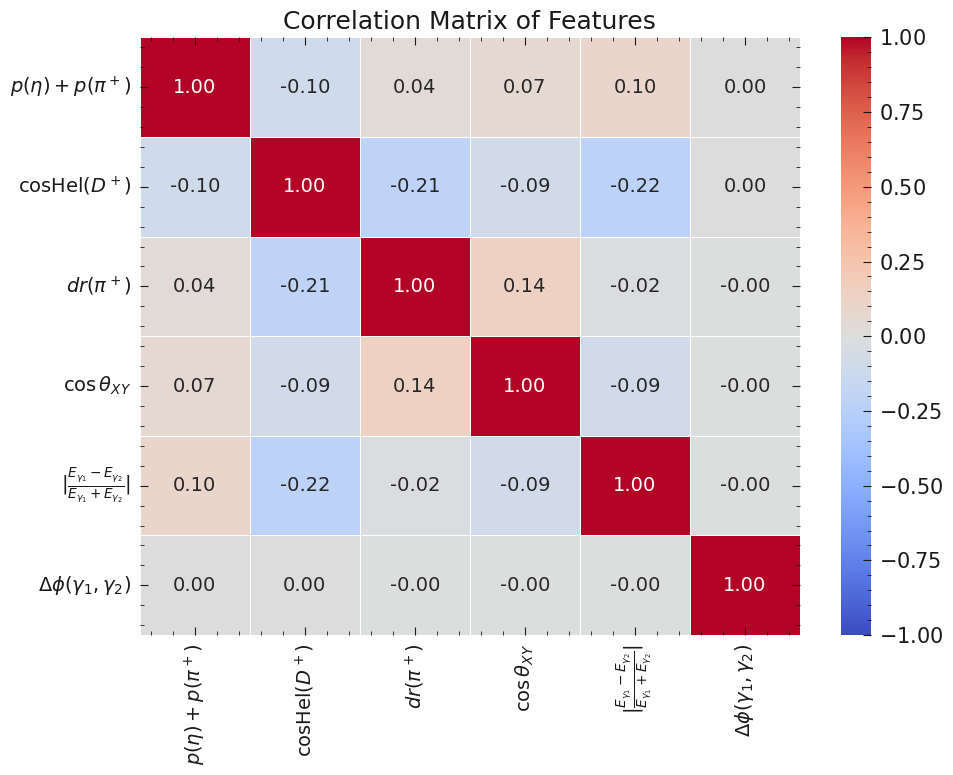

In [21]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import os
# # plt.rcParams['text.usetex'] = True

# # # Rename the features
# feature_names = {
#     'Pip_dr': r'$dr(\pi^+)$',
#     'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane': r'$\cos \theta_{XY}$',
#     'etapip_Eta_Easym': r'$|\frac{E_{\gamma_1} - E_{\gamma_2} }{E_{\gamma_1} + E_{\gamma_2}}|$',
#     'etapip_Eta_daughterDiffOfPhi_0_1': r'$\Delta \phi (\gamma_1,\gamma_2)$',
#     'Dp_Psum': r'$p(\eta)+p(\pi^+)$',
#     'Dp_cosHelicityAngleMomentum': r'cosHel$(D^+)$'
# }

# # # Apply the renaming
# df_combined.rename(columns=feature_names, inplace=True)

# # Compute the correlation matrix
# corr_matrix = df_combined.drop(columns=['label']).corr()

# # Plot the correlation matrix with larger annotation text
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
#             vmin=-1, vmax=1,  # Set the limits of the colormap
#             xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, 
#             annot_kws={"size": 14})  # Increase the size of the correlation numbers

# # Set the title and label sizes
# plt.title('Correlation Matrix of Features', fontsize=18)  # Title size
# plt.xticks(fontsize=14)  # X-axis label size
# plt.yticks(fontsize=14)  # Y-axis label size

# # # Ensure the path is expanded correctly
# # save_path = os.path.expanduser('~/PLOTS/DNN/belle2_etapip_gg_correlation_240919_coshel_momentum.png')

# plt.tight_layout()
# # # Save the figure
# # plt.savefig(save_path)
# plt.savefig("MC15rd_etapip_gg_corr_loose_v2.png")

# plt.show()


In [16]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df_combined.drop(columns='label')
y = df_combined['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# import joblib
# model_file = "best_xgb_model_etapip_gg_K_loose_v2.pkl"
# best_xgb_model = joblib.load(model_file)

In [18]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features and target
X = X_train
y = y_train

# Define the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for XGBoost
#param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }
param_grid = {
    'n_estimators': [100, 300, 500, 700, 900, 1100],
    'max_depth': [5, 7, 9, 11],
    'learning_rate': [0.005, 0.01, 0.1, 0.2],
    'subsample': [0.8,0.9, 1.0],
    'colsample_bytree': [0.8,0.9, 1.0]
}


# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=28
)

# Perform the grid search
grid_search.fit(X, y)



# Get the best model and its parameters
best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Save the best model if needed
import joblib
joblib.dump(best_xgb_model, 'MC15rd_best_xgb_model_etapip_gg_loose_v3.pkl')


# xgb_model.fit(X,y)
# best_xgb_model = xgb_model


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

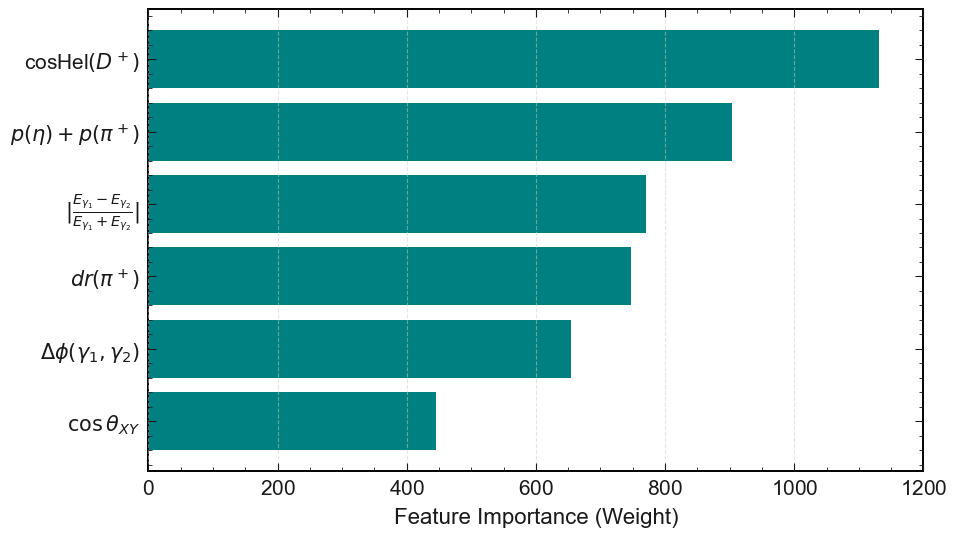

In [17]:
# Extract the underlying Booster object from the trained XGBClassifier
booster = best_xgb_model.get_booster()

# Get the feature importances with 'weight'
importance_dict = booster.get_score(importance_type='weight')

# The rest of the code remains the same
import pandas as pd

# Rename the features for display
feature_names = {
    'Pip_dr': r'$dr(\pi^+)$',
    'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane': r'$\cos \theta_{XY}$',
    'etapip_Eta_Easym': r'$|\frac{E_{\gamma_1} - E_{\gamma_2} }{E_{\gamma_1} + E_{\gamma_2}}|$',
    'Dp_Psum': r'$p(\eta)+p(\pi^+)$',
    'etapip_Eta_daughterDiffOfPhi_0_1': r'$\Delta \phi (\gamma_1,\gamma_2)$',
    'Dp_cosHelicityAngleMomentum': r'cosHel$(D^+)$'
}

# Convert to a DataFrame for easier manipulation
importance_df = pd.DataFrame.from_dict(importance_dict, orient='index', columns=['Weight'])
importance_df.index = [feature_names.get(f, f) for f in importance_df.index]  # Rename using LaTeX labels
importance_df = importance_df.sort_values(by='Weight', ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df.index, importance_df['Weight'], color='teal')
plt.xlabel('Feature Importance (Weight)', fontsize=16)
# plt.title('Feature Importances with Customized Labels', fontsize=14)
plt.gca().invert_yaxis()  # Show the most important feature on top
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.savefig("MC15rd_etapip_gg_importance_loose_v3.png")

# Show plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract all mean cross-validation scores and parameter combinations
results_df = pd.DataFrame(grid_search.cv_results_)

# Sort results by mean test score in descending order
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Highlight the best score
best_score = grid_search.best_score_

# Plotting the scores using Matplotlib
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(
    range(len(results_df)),
    results_df['mean_test_score'],
    c='blue',  # Color for the points
    s=10,
    marker='o',
    label='Mean CV Score'
)

# Highlighting the best score
best_index = results_df['mean_test_score'].idxmax()
plt.scatter(best_index, best_score, color='red', s=20, label=f'Best Score: {best_score:.4f}', edgecolor='black')

# Adding labels and legend
plt.title("Grid Search CV Scores for XGBoost Hyperparameter Tuning")
plt.xlabel("Hyperparameter Combination Index")
plt.ylabel("Mean CV Accuracy Score")
plt.legend()
plt.xlim(0,)
# Save the figure
plt.savefig("MC15rd_etapip_gg_gridsearch_loose_v3.png")

# Show the plot
plt.show()

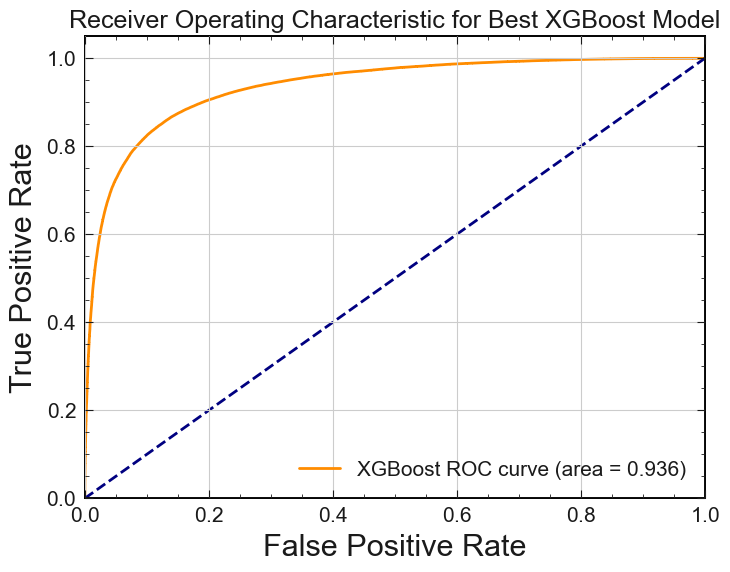

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Best XGBoost Model')
plt.legend(loc='lower right')
plt.grid(True)

# Uncomment the following lines to save the plot
# save_path = '~/PLOTS/XGBoost/240919_ROC_xgb.png'
# save_path_full = os.path.expanduser(save_path)
# plt.savefig(save_path_full)
plt.savefig("MC15rd_etapip_gg_roc_loose_v3.png")

plt.show()

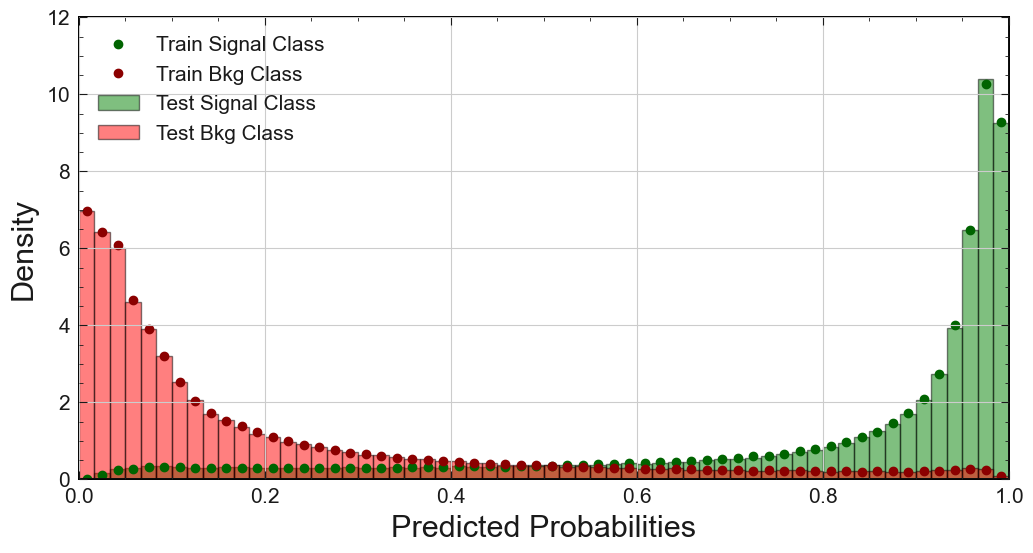

In [19]:
# Get predicted probabilities
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]

import matplotlib.pyplot as plt
import numpy as np

# Function to plot histograms for train (as points) and test (as bars)
def plot_probability_histograms(y_train_true, y_train_probs, y_test_true, y_test_probs):
    plt.figure(figsize=(12, 6))
    
    # Define a common set of bins for both train and test
    bins = np.linspace(0, 1, 61)  # 60 bins from 0 to 1 for predicted probabilities

    # Test set: Plot histograms as bars
    plt.hist(y_test_probs[y_test_true == 1], bins=bins, alpha=0.5, label='Test Signal Class', color='green', edgecolor='black', density=True)
    plt.hist(y_test_probs[y_test_true == 0], bins=bins, alpha=0.5, label='Test Bkg Class', color='red', edgecolor='black', density=True)

    # Train set: Calculate histogram values for points
    hist_train_pos, _ = np.histogram(y_train_probs[y_train_true == 1], bins=bins, density=True)
    hist_train_neg, _ = np.histogram(y_train_probs[y_train_true == 0], bins=bins, density=True)

    # Calculate the bin centers (to place the points in the middle of each bin)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # Plot the train set histograms as points
    plt.plot(bin_centers, hist_train_pos, 'o', label='Train Signal Class', color='darkgreen')
    plt.plot(bin_centers, hist_train_neg, 'o', label='Train Bkg Class', color='darkred')

    # Labels, title, and legend
    plt.xlabel('Predicted Probabilities')
    plt.ylabel('Density')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlim(0,1)

# Calculate predicted probabilities for the training and test sets
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# Plot histograms with train set as points and test set as bars
plot_probability_histograms(
    y_train, y_train_probs,
    y_test, y_test_probs
)

# save_path = '~/PLOTS/HBDT/240919_outputs_momentum_sum.png'
# save_path_full = os.path.expanduser(save_path)

# plt.savefig(save_path_full)
plt.savefig("MC15rd_train_test_etapip_gg_loose_v3.png")
plt.show()


In [20]:
base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/etapip_eteeta/MC15rd_etaetapip_loose_v3_241129"
cm_elements = ["15rd_eta_e7_18_4S_v3", "15rd_eta_e20_b26_v1", "15rd_eta_e20_e26_4S_v2", "15rd_eta_e21_5S_scan_v1", "15rd_eta_mori_off_v1"]

file_list = []
for element in cm_elements:
    pattern = f"{base_path}/{element}/*.root"
    file_list += glob.glob(pattern)

# Initialize an empty list to hold DataFrames
dataframes = []

# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_gg"]

    # Specify the branches you want to extract
    branches = ['Pip_pionID','Dp_Psum','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg_apply = pd.concat(dataframes, ignore_index=True)

# df_bkg_apply = df_bkg_apply.query('dM_pi0_mask_nonan>0.011 &  dM_pi0_mask_2_nonan>0.011 ')


In [21]:
# Separate signal and background data
df_isSignal_true = df_bkg_apply.query('Dp_isSignal==1')
df_isSignal_false = df_bkg_apply.query('Dp_isSignal!=1')




In [22]:
df_isSignal_false

,Pip_pionID,Dp_Psum,dM_pi0_mask_nonan,dM_pi0_mask_2_nonan,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,...,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_Easym,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan,etapip_Eta_daughterDiffOfPhi_0_1,etapip_Eta_daughterAngle_0_1
0,0.996646,3.204330,0.012022,0.011631,2.0,0.0,23.0,0.0,0.896638,0.000367,...,0.926507,2.773329,2.632377,0.473378,0.431001,0.835714,2.095798,-1.0,-2.481904,2.204589
1,0.911579,3.703660,0.027573,0.166208,4.0,0.0,20413.0,0.0,-0.089553,0.001039,...,-0.990734,1.588885,2.719479,0.655769,2.114775,0.630672,1.815471,-1.0,-0.276699,0.677233
2,0.702810,3.148834,0.017366,0.175328,2.0,14.0,23.0,-421.0,-0.719001,0.002918,...,-0.958999,0.608426,2.522771,0.405838,2.540408,0.862404,1.864638,-1.0,0.046228,0.465516
4,0.958019,4.082799,0.027683,0.019381,13.0,13.0,-431.0,-431.0,-0.246156,0.023943,...,0.999508,1.505984,2.886216,0.510810,2.576815,0.055126,1.974088,-1.0,0.228815,0.488656
5,0.999999,4.180226,0.089128,0.061882,26.0,16.0,-213.0,-431.0,-0.261412,0.007302,...,0.999895,1.444702,3.243102,0.490151,2.735524,0.387660,1.646798,-1.0,0.450003,0.454495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27590258,0.914432,4.380363,0.394731,0.020786,2.0,0.0,23.0,0.0,-0.741664,0.005916,...,0.999996,0.683455,5.012119,0.937943,3.696907,0.548477,1.927433,-1.0,-0.811557,0.872882
27590259,0.999023,2.973640,0.150777,0.024539,2.0,0.0,23.0,0.0,0.897325,0.001674,...,1.000000,2.564716,2.915561,0.227896,0.408924,0.920360,2.010232,-1.0,1.935818,1.933487
27590260,0.904403,3.821586,0.017604,0.153183,5.0,0.0,213.0,0.0,0.930116,0.000208,...,0.999999,3.368296,3.468711,0.125115,0.453290,0.624273,1.685402,-1.0,-1.978031,1.778421
27590261,0.960091,3.247964,0.274242,0.062264,9.0,2.0,223.0,23.0,-0.917503,0.224326,...,0.999995,0.361557,2.946772,0.038194,2.886408,0.033298,1.880499,-1.0,0.336871,0.375430


In [23]:
# Drop the specified columns, but keep 'Dp_M' for reference
columns_to_drop = ['Pip_pionID','Dp_CMS_p','CFT_prob','etapip_Eta_daughterAngle_0_1','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','etapip_Eta_p','Pip_p','num_Dstar_no_nan','Dp_M','Pip_genMotherID', 'etapip_Eta_genMotherID', 'Pip_genMotherPDG', 'Dp_isSignal', 'etapip_Eta_genMotherPDG']
df_isSignal_true_dropped = df_isSignal_true.drop(columns=columns_to_drop)
df_isSignal_false_dropped = df_isSignal_false.drop(columns=columns_to_drop)



In [24]:
df_isSignal_true_dropped

,Dp_Psum,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,etapip_Eta_Easym,etapip_Eta_daughterDiffOfPhi_0_1
3,5.444216,0.524799,0.029147,1.000000,0.740857,1.110315
17,3.838513,-0.040992,0.006875,0.999997,0.130193,0.444509
23,4.102741,-0.004952,0.023375,0.999998,0.328817,0.657756
48,2.735995,0.340899,0.000349,0.997515,0.294028,-1.732117
108,4.824297,0.279933,0.004457,0.999995,0.724192,-0.046590
...,...,...,...,...,...,...
25631911,4.368147,0.344871,0.006399,1.000000,0.727691,-0.987926
25631916,3.053684,0.057528,0.016114,1.000000,0.445099,-0.140305
25631926,3.949391,-0.429635,0.064446,1.000000,0.382361,0.225766
25631966,4.215407,-0.414011,0.003530,0.999977,0.493146,-0.364844


In [25]:
# Reorder the columns of df_isSignal_true_dropped and df_isSignal_false_dropped to match the training data's feature order
df_isSignal_true_dropped = df_isSignal_true_dropped[best_xgb_model.get_booster().feature_names]
df_isSignal_false_dropped = df_isSignal_false_dropped[best_xgb_model.get_booster().feature_names]

# Now try to predict probabilities
isSignal_true_probabilities = best_xgb_model.predict_proba(df_isSignal_true_dropped)
df_isSignal_true_dropped['prob_signal'] = isSignal_true_probabilities[:, 1]

isSignal_false_probabilities = best_xgb_model.predict_proba(df_isSignal_false_dropped)
df_isSignal_false_dropped['prob_signal'] = isSignal_false_probabilities[:, 1]


In [26]:
# Optionally, you can combine the datasets back with 'Dp_M' if needed
df_isSignal_true_combined = pd.merge(df_isSignal_true, df_isSignal_true_dropped[['prob_signal']], left_index=True, right_index=True)
df_isSignal_false_combined = pd.merge(df_isSignal_false, df_isSignal_false_dropped[['prob_signal']], left_index=True, right_index=True)


In [27]:
# Prepare the data
df_combined_all_range = pd.concat([df_isSignal_true_combined, df_isSignal_false_combined], ignore_index=True)

df_combined_all_range['Dp_isSignal'] = df_combined_all_range['Dp_isSignal'].fillna(0)

In [28]:
# df_combined_all_range = df_combined_all_range.query('num_Dstar_no_nan>0')

In [29]:
df_combined_all_range.columns.tolist()

['Pip_pionID',
 'Dp_Psum',
 'dM_pi0_mask_nonan',
 'dM_pi0_mask_2_nonan',
 'Pip_genMotherID',
 'etapip_Eta_genMotherID',
 'Pip_genMotherPDG',
 'etapip_Eta_genMotherPDG',
 'Dp_cosHelicityAngleMomentum',
 'Pip_dr',
 'Dp_isSignal',
 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'Pip_p',
 'Dp_CMS_p',
 'etapip_Eta_Easym',
 'etapip_Eta_p',
 'CFT_prob',
 'Dp_M',
 'num_Dstar_no_nan',
 'etapip_Eta_daughterDiffOfPhi_0_1',
 'etapip_Eta_daughterAngle_0_1',
 'prob_signal']

In [30]:
df_combined = df_combined_all_range.query('Dp_M>1.83 & Dp_M<1.89')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


Best cut value: 0.88
Best figure of merit: 138.88859318100734


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


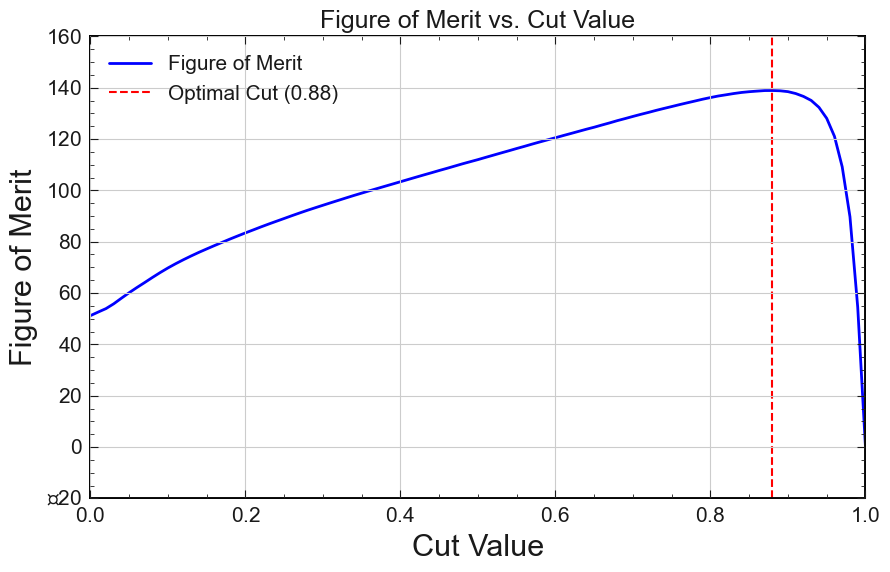

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
scale = 1/4
# Define the figure of merit function using query
def figure_of_merit(df, cut_value):
    df_cut = df.query('prob_signal > @cut_value')
    Nsig = (df_cut['Dp_isSignal'] == 1).sum()
    Nbkg = (df_cut['Dp_isSignal'] != 1).sum()
    if Nsig + Nbkg == 0:
        return 0
    return Nsig*scale / np.sqrt(Nsig*scale + Nbkg*scale)

# Define range of cut values to test
cut_values = np.linspace(0, 1, 101)  # You can adjust the range and granularity

# Calculate figure of merit for each cut value
figures_of_merit = [figure_of_merit(df_combined, cut) for cut in cut_values]

# Find the best cut value
best_cut = cut_values[np.argmax(figures_of_merit)]
best_fom = max(figures_of_merit)

# Print the best cut value and corresponding figure of merit
print(f'Best cut value: {best_cut}')
print(f'Best figure of merit: {best_fom}')

# Plot figure of merit vs. cut value
plt.figure(figsize=(10, 6))
plt.plot(cut_values, figures_of_merit, color='blue', label='Figure of Merit', linewidth=2)
plt.axvline(x=best_cut, color='red', linestyle='--', label=f'Optimal Cut ({best_cut:.2f})')
plt.xlabel('Cut Value')
plt.ylabel('Figure of Merit')
plt.title('Figure of Merit vs. Cut Value')
plt.xlim(0,1)
plt.legend()
plt.grid(True)
plt.savefig("MC15rd_etapip_gg_FOM_loose_v3.png")

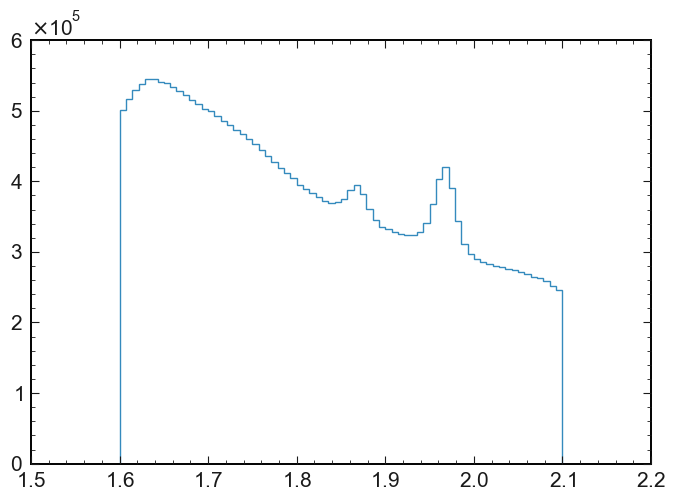

In [32]:
plt.hist(df_combined_all_range['Dp_M'],bins=np.linspace(1.6,2.1,71),histtype='step');

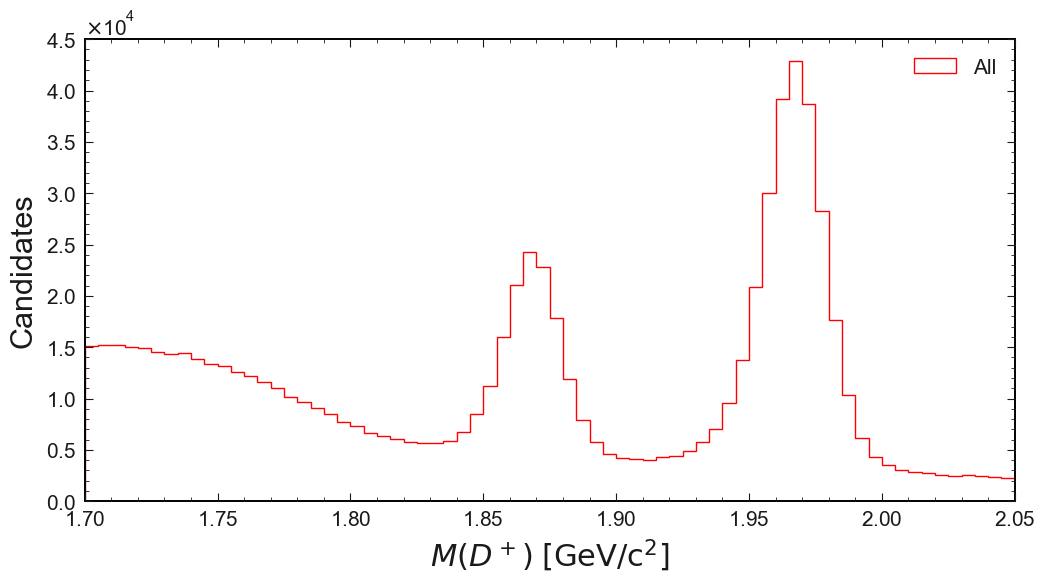

nsig=118255
nsig=29563.75


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > @optimal_cut')
# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='All')

# Histogram for background
# plt.hist(df_background['Dp_M'], bins=np.linspace(1.6, 2.1, 71), histtype='step', color='red', label='Background')

plt.xlabel('Dp_M')
plt.ylabel('Candidates')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(1.7,2.05)
plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')

plt.savefig("MC15rd_etapip_gg_Dp_M_all_loose_v3.png")

plt.show()


scale = 1/4
df_signal_matched_true = df_signal.query('Dp_isSignal==1')
print(f'nsig={len(df_signal_matched_true)}')
print(f'nsig={len(df_signal_matched_true)*scale}')

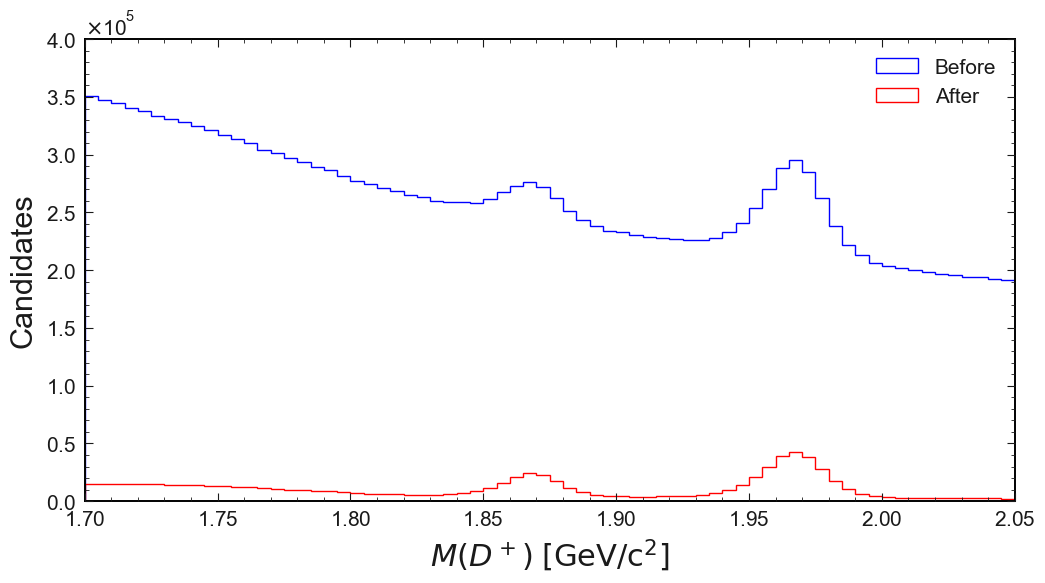

n_before=27590263
n_after=1079237
cut eff=0.0391165897911158


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > 0')
df_background = df_combined_all_range.query('prob_signal > @optimal_cut')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='blue', label='Before')

# Histogram for background
plt.hist(df_background['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='After')

plt.xlabel('Dp_M')
plt.ylabel('Candidates')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)

plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')
plt.xlim(1.7,2.05)
plt.savefig("MC15rd_etapip_gg_Dp_M_before_after_loose_v3.png")

plt.show()


print(f'n_before={len(df_signal)}')
print(f'n_after={len(df_background)}')
print(f'cut eff={len(df_background)/len(df_signal)}')

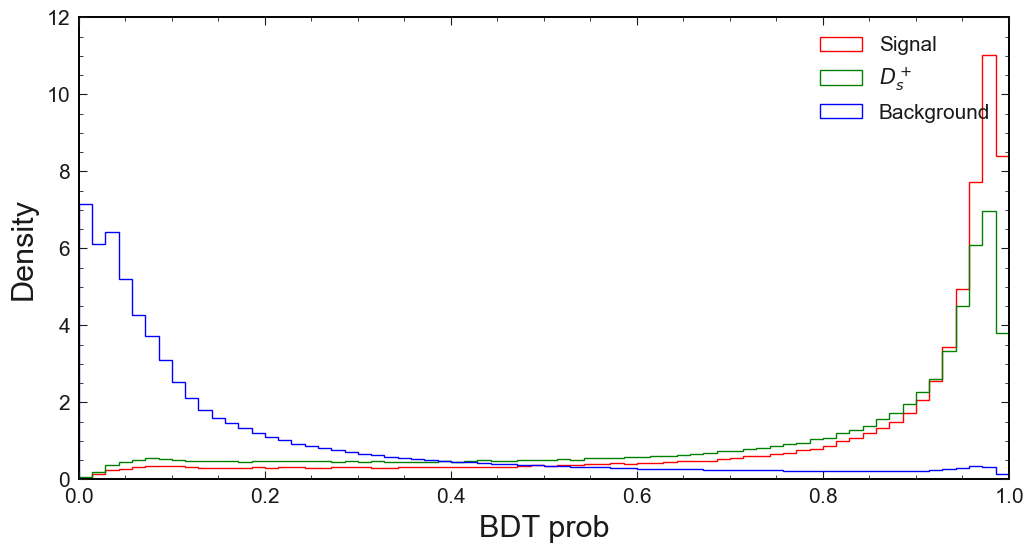

nsig=194796


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('Dp_isSignal==1')
df_background = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')
df_background_Ds = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID==etapip_Eta_genMotherID) & abs(Pip_genMotherPDG)==431 & abs(etapip_Eta_genMotherPDG)==431')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='red', label='Signal',density=True)
plt.hist(df_background_Ds['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='green', label='$D_s^+$',density=True)

# Histogram for background
plt.hist(df_background['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='blue', label='Background',density=True)

plt.xlabel('BDT prob')
plt.ylabel('Density')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(0,1)
plt.savefig("MC15rd_etapip_gg_BDT_output_Dp_Ds_bkg_loose_v3.png")

plt.show()


print(f'nsig={len(df_signal)}')